In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# ペアプロットのためseabornを使用します
!pip install -q seaborn

In [3]:
import pathlib

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

#print(tf.__version__)

In [5]:
dataset_path = '/content/drive/Shareddrives/NLP/data/Rpat2_osusume.csv'
pattern = 2

raw_dataset = pd.read_csv(dataset_path)

dataset = raw_dataset.copy()

dataset.isna().sum()
dataset = dataset.dropna()

if pattern == 2 or pattern == 4:
  day = dataset.pop('day')
  dataset['Mon'] = (day == 1)*1.0
  dataset['Tue'] = (day == 2)*1.0
  dataset['Wed'] = (day == 3)*1.0
  dataset['Thu'] = (day == 4)*1.0
  dataset['Fri'] = (day == 5)*1.0
  dataset['Sat'] = (day == 6)*1.0
  dataset['Sun'] = (day == 7)*1.0

  if pattern == 2:
    dataset.drop(columns='minute')

  hour = dataset.pop('hour')
  dataset['am0'] = (hour == 0)*1.0
  dataset['am1'] = (hour == 1)*1.0
  dataset['am2'] = (hour == 2)*1.0
  dataset['am3'] = (hour == 3)*1.0
  dataset['am4'] = (hour == 4)*1.0
  dataset['am5'] = (hour == 5)*1.0
  dataset['am6'] = (hour == 6)*1.0
  dataset['am7'] = (hour == 7)*1.0
  dataset['am8'] = (hour == 8)*1.0
  dataset['am9'] = (hour == 9)*1.0
  dataset['am10'] = (hour == 10)*1.0
  dataset['am11'] = (hour == 11)*1.0
  dataset['am12'] = (hour == 12)*1.0
  dataset['pm1'] = (hour == 13)*1.0
  dataset['pm2'] = (hour == 14)*1.0
  dataset['pm3'] = (hour == 15)*1.0
  dataset['pm4'] = (hour == 16)*1.0
  dataset['pm5'] = (hour == 17)*1.0
  dataset['pm6'] = (hour == 18)*1.0
  dataset['pm7'] = (hour == 19)*1.0
  dataset['pm8'] = (hour == 20)*1.0
  dataset['pm9'] = (hour == 21)*1.0
  dataset['pm10'] = (hour == 22)*1.0
  dataset['pm11'] = (hour == 23)*1.0

train_dataset = dataset.sample(frac=0.8,random_state=0)
test_dataset = dataset.drop(train_dataset.index)

train_stats = train_dataset.describe()
train_stats.pop("engagement")
train_stats = train_stats.transpose()

train_labels = train_dataset.pop('engagement')
test_labels = test_dataset.pop('engagement')

def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

def build_model():
  model = keras.Sequential([
    layers.Dense(512, kernel_regularizer=keras.regularizers.l2(0.001), activation='relu', input_shape=[len(train_dataset.keys())]),
    layers.Dropout(0.25),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.25),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.25),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.25),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.25),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.25),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.25),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.25),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.25),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.Adam(lr=0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

model = build_model()

#model.summary()

example_batch = normed_train_data[:10]
example_result = model.predict(example_batch)

# エポックが終わるごとにドットを一つ出力することで進捗を表示
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [6]:
def plot_history(history, path = ''):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  fig1 = plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [engagement]')
  plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
  plt.ylim([0, 150])
  plt.legend()

  fig2 = plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$engagement^2$]')
  plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
  plt.ylim([0,2500000])
  plt.legend()
  plt.show()

  if not path == '':
    fig1.savefig(path + '_mae.png')
    fig2.savefig(path + '_mse.png')

#plot_history(history)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")



....................................................................................................

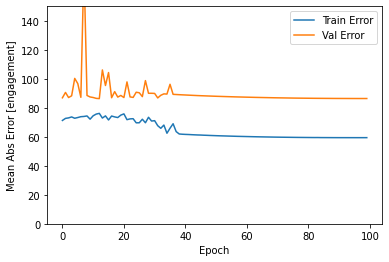

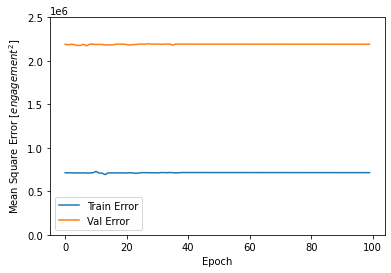

In [7]:
output_path = '/content/drive/Shareddrives/NLP/outputs/Rpat2_osusume_10-34' #.pngはつけない

EPOCHS = 100

model = build_model()

# patience は改善が見られるかを監視するエポック数を表すパラメーター
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

#history = model.fit(normed_train_data, train_labels, epochs=EPOCHS,
#                    validation_split = 0.2, verbose=0, callbacks=[early_stop, PrintDot()])

history = model.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=0, callbacks=[PrintDot()])

plot_history(history, output_path)
#plot_history(history)

In [ ]:
#(test_images, test_labels) = tf.keras.datasets.mnist.load_data('/content/drive/MyDrive/data/Rpat2_osusume_good1-10.csv')
 
#test_labels = test_labels[:10]
 
#test_images = test_images[:1000].reshape(-1, 28 * 28) / 255.0

In [29]:
train_labels

10842    42
20495    11
17675     6
12959     2
12656    15
         ..
3808      3
8544     20
19652    19
4923      9
18317    57
Name: engagement, Length: 17623, dtype: int64

In [27]:
len(test_labels)

2

In [26]:
test_labels

(array([[[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        ...,
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],

In [25]:
dataset_good_path = '/content/drive/MyDrive/data/Rpat2_osusume_good1-10.csv'

pattern = 2

raw_good_dataset = pd.read_csv(dataset_good_path)

dataset_good = raw_good_dataset.copy()

dataset_good.isna().sum()
dataset_good = dataset_good.dropna()

if pattern == 2 or pattern == 4:
  day = dataset_good.pop('day')
  dataset_good['Mon'] = (day == 1)*1.0
  dataset_good['Tue'] = (day == 2)*1.0
  dataset_good['Wed'] = (day == 3)*1.0
  dataset_good['Thu'] = (day == 4)*1.0
  dataset_good['Fri'] = (day == 5)*1.0
  dataset_good['Sat'] = (day == 6)*1.0
  dataset_good['Sun'] = (day == 7)*1.0

  if pattern == 2:
    dataset_good.drop(columns='minute')

  hour = dataset_good.pop('hour')
  dataset_good['am0'] = (hour == 0)*1.0
  dataset_good['am1'] = (hour == 1)*1.0
  dataset_good['am2'] = (hour == 2)*1.0
  dataset_good['am3'] = (hour == 3)*1.0
  dataset_good['am4'] = (hour == 4)*1.0
  dataset_good['am5'] = (hour == 5)*1.0
  dataset_good['am6'] = (hour == 6)*1.0
  dataset_good['am7'] = (hour == 7)*1.0
  dataset_good['am8'] = (hour == 8)*1.0
  dataset_good['am9'] = (hour == 9)*1.0
  dataset_good['am10'] = (hour == 10)*1.0
  dataset_good['am11'] = (hour == 11)*1.0
  dataset_good['am12'] = (hour == 12)*1.0
  dataset_good['pm1'] = (hour == 13)*1.0
  dataset_good['pm2'] = (hour == 14)*1.0
  dataset_good['pm3'] = (hour == 15)*1.0
  dataset_good['pm4'] = (hour == 16)*1.0
  dataset_good['pm5'] = (hour == 17)*1.0
  dataset_good['pm6'] = (hour == 18)*1.0
  dataset_good['pm7'] = (hour == 19)*1.0
  dataset_good['pm8'] = (hour == 20)*1.0
  dataset_good['pm9'] = (hour == 21)*1.0
  dataset_good['pm10'] = (hour == 22)*1.0
  dataset_good['pm11'] = (hour == 23)*1.0

test_good_labels = dataset_good.pop('engagement')

#normed_test_data = norm(test_dataset)

def norm(y):
  return (y - train_stats['mean']) / train_stats['std']
normed_test_good_data = norm(dataset_good)

import math

output_path = '/content/drive/Shareddrives/NLP/outputs/Rpat2_osusume_10-33.txt'

loss, mae, mse = model.evaluate(normed_test_good_data,test_labels,verbose=2)

print("Testing set Mean Abs Error: {:5.2f} engagement".format(mae))
print("Testing set Mean Squared Error: {:5.2f} engagement".format(mse))
print("Testing set Root Mean Squared Error: {:5.2f} engagement".format(math.sqrt(mse)))

with open(output_path, 'a', newline='') as f:
    f.write("Testing set Mean Abs Error: {:5.2f} engagement".format(mae))
    f.write("Testing set Mean Squared Error: {:5.2f} engagement".format(mse))
    f.write("Testing set Root Mean Squared Error: {:5.2f} engagement".format(math.sqrt(mse)))

ValueError: ignored

In [ ]:
import math

output_path = '/content/drive/Shareddrives/NLP/outputs/Rpat2_osusume_10-33.txt'

t_dataset = pd.read_csv('/content/drive/MyDrive/data/Rpat2_osusume_good.csv')
t_dataset.isna().sum()
t_dataset = t_dataset.dropna()

#loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=2)
loss, mae, mse = model.evaluate(t_dataset, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} engagement".format(mae))
print("Testing set Mean Squared Error: {:5.2f} engagement".format(mse))
print("Testing set Root Mean Squared Error: {:5.2f} engagement".format(math.sqrt(mse)))

with open(output_path, 'a', newline='') as f:
    f.write("Testing set Mean Abs Error: {:5.2f} engagement".format(mae))
    f.write("Testing set Mean Squared Error: {:5.2f} engagement".format(mse))
    f.write("Testing set Root Mean Squared Error: {:5.2f} engagement".format(math.sqrt(mse)))

ValueError: ignored

In [ ]:
import csv
import numpy as np

with open('/content/drive/MyDrive/data/Rpat2_osusume_kasudata.csv') as f:
    data = csv.reader(f)
    data_list = [datum for datum in data]
    test_data = np.array(data_list[3])
    test_data = np.delete(test_data, 0)

#print(test_data)

predictions = model.predict(test_data)

print(predictions)

ValueError: ignored

In [19]:
import math

output_path = '/content/drive/Shareddrives/NLP/outputs/Rpat2_osusume_10-32.txt'
loss, mae, mse = model.evaluate(normed_test_data,test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} engagement".format(mae))
print("Testing set Mean Squared Error: {:5.2f} engagement".format(mse))
print("Testing set Root Mean Squared Error: {:5.2f} engagement".format(math.sqrt(mse)))

with open(output_path, 'a', newline='') as f:
    f.write("Testing set Mean Abs Error: {:5.2f} engagement".format(mae))
    f.write("Testing set Mean Squared Error: {:5.2f} engagement".format(mse))
    f.write("Testing set Root Mean Squared Error: {:5.2f} engagement".format(math.sqrt(mse)))

138/138 - 1s - loss: 1177229.2500 - mae: 74.8156 - mse: 1177229.2500
Testing set Mean Abs Error: 74.82 engagement
Testing set Mean Squared Error: 1177229.25 engagement
Testing set Root Mean Squared Error: 1085.00 engagement
